# Customer Segmentation : K-means Clustering #

1. Explanation of the Dataset
Dataset Name: Customer Segmentation dataset from Kaggle.
Attributes and Instances: 
Id: Unique identifier for each individual in the dataset.
Year_Birth: The birth year of the individual.
Education: The highest level of education attained by the individual.
Marital_Status: The marital status of the individual.
Income: The annual income of the individual.
Kidhome: The number of young children in the household.
Teenhome: The number of teenagers in the household.
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
Recency: The number of days since the last purchase or interaction.
MntWines: The amount spent on wines.
MntFruits: The amount spent on fruits.
MntMeatProducts: The amount spent on meat products.
MntFishProducts: The amount spent on fish products.
MntSweetProducts: The amount spent on sweet products.
MntGoldProds: The amount spent on gold products.
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
NumWebPurchases: The number of purchases made through the company's website.
NumCatalogPurchases: The number of purchases made through catalogs.
NumStorePurchases: The number of purchases made in physical stores.
NumWebVisitsMonth: The number of visits to the company's website in a month.
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
Z_CostContact: A constant cost associated with contacting a customer.
Z_Revenue: A constant revenue associated with a successful campaign response.
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

The dataset under analysis contains information about customers’ interactions with a company, their demographic details, and their purchasing history across different product categories. The features include variables related to customers' spending on various products, their engagement with marketing campaigns, and personal demographics such as age and family size.

## Main Objective ##
By applying a clustering method to this dataset, the objective is to gain insights into the following:

Customer Segmentation: Grouping customers into distinct segments based on similarities in purchasing patterns, demographics, and responses to marketing campaigns. This helps to tailor marketing and sales strategies to different customer profiles.

Targeted Marketing: Identifying which groups of customers respond best to marketing campaigns, allowing for more effective allocation of marketing resources.

Product Affinity: Understanding which products are favored by different segments of customers, which can guide inventory management and product development.

2. Explanation of the k-Means Algorithm and Its Use in the Analysis
The k-means algorithm is a centroid-based clustering technique that partitions the dataset into k clusters. Each cluster is characterized by its central point, or centroid. The steps in the k-means algorithm and its application to the analysis are as follows:

Initialization: Choose k initial centroids, either randomly or based on some heuristic.
Assignment: Assign each data point to the nearest centroid based on the Euclidean distance.
Update: Recalculate the centroids as the mean of all points assigned to each cluster.
Iteration: Repeat the assignment and update steps until the centroid positions stabilize and the assignment of points to clusters no longer changes significantly.
Convergence: The algorithm has converged when the centroids do not move or the changes are negligible.

Intuition and Mathematical Representation:
The goal of k-means is to minimize within-cluster variance, which is quantified by the WCSS.
The algorithm assumes that the clusters are spherical and that the variance within each cluster is roughly equal, meaning it tends to work best when clusters are isotropic and of similar size.
Euclidean distance is used to assign points to the nearest cluster, calculated as follows:
D(x,y)=∑i=1n square root of (xi−yi)2

where D is the distance between two points x and y with n dimensions.
Assumptions of k-Means:

Clusters are spherical: so the variance within the cluster is the same in all directions.
Clusters are of similar volume: This may not hold true for data with widely varying densities.
Features have the same scale: Otherwise, larger scale features will dominate the distance metric. That's why feature scaling is important before applying k-means.
The optimal number of clusters k is known: In practice, this is rarely the case, and methods like the Elbow Method are used to estimate k.
In the context of the current analysis, the k-means algorithm will be used to segment the customer base, with the number of clusters determined by the Elbow Method. The results will be interpreted to provide actionable insights into customer behavior and to inform strategic business decisions.

In [1]:
# 3. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.shape

(2240, 29)

In [4]:
# Display the first few rows of the dataset
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Display summary statistics
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Initial Exploration Summary
Here's the insights gain from the data:

Data Shape and Features: The dataset includes 29 columns (features) and 2240 rows (entries).
Missing Data: There are 24 missing values in the Income column. This needs to be addressed during data cleaning.
Data Types: Most columns seem to be in appropriate formats, but we will need to convert Dt_Customer from a string to a datetime format.
Statistical Summary: Features vary widely in terms of ranges and distributions. For example, spending on different products (MntWines, MntFruits, etc.) varies significantly.


## 4. Data Cleaning ##

In [8]:
# Handle missing values in 'Income'
df['Income'].fillna(df['Income'].median(), inplace= True)


# Verify changes
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


## Exploratory Data analysis ##

Explore the unique values in the categorical features to get a clear idea of the data.

In [10]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


### Calculate "Age" of a customer by the "Year_Birth".(indicating the birth year of the respective person.) We will calculate age till 2014. As we have data till 2014. ###

In [11]:
df['Age_on_2014'] = 2014 - df['Year_Birth']
df['Age_on_2014']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age_on_2014, Length: 2240, dtype: int64

## Feature Engineering ##

### Add new feature "Total_Spent" indicating the total amount spent by the customer in various categories over the span of two years. ##

In [12]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Spent'] 

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spent, Length: 2240, dtype: int64

### Created new feature "Living_with" out of "Marital_Status" to extract the living situation of couples. ###

In [13]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df['Living_with']

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_with, Length: 2240, dtype: object

### Add new feature "Children" to indicate total children in household (kid + Teen). ###

In [14]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

### Add new feature "Family_size". ###

In [15]:
df['Family_size'] = df['Living_with'].replace({"Alone": 1, "Partner": 2}) + df['Children']
df['Family_size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_size, Length: 2240, dtype: int64

### Add new feature "Is_parent" indicating parenthood status. ###

In [16]:
df['Is_parent'] = np.where(df.Children > 0, 1, 0)
df['Is_parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_parent, Length: 2240, dtype: int64

In [17]:
# For clarity
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

### Simplify values of "Education". (In three groups). ###

In [18]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

### Droping the unnecessary & original features since we extract new features from it ###

In [19]:
df = df.drop(columns = ['Marital_Status', 'Dt_Customer', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], axis = 1)

In [20]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0   172      88  ...             0             0         0         1   
1     2       1  ...             0             0         0         0   
2   111      21  ...             0             0         0         0   
3    10       3  ...             0             0         0         0   
4    46      27  ...             0             0         0         0   

   Age_on_2014  Total_Spent  Living_with  Children  Family_size  Is_parent  
0           57         1617        Alone         0            1          0  
1           60           27        Alone         2            3          1  
2           49          776      Partner         0            2          0  
3           30           53      Partner         1            3          1  
4           33          422      Partner         1            3          1  

[5 rows x 29 columns]

In [21]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52237.975446     0.444196     0.506250    49.109375   303.935714   
std     25037.955891     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Age_on_2014  Total_Spent     Children  Family_size    Is_parent  
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean     45.194196   605.798214     0.950446     2.595089     0.715179  
std      11.984069   602.249288     0.751803     0.906959     0.451430  
min      18.000000     5.000000     0.000000     1.000000     0.000000  
25%      37.000000    68.750000     0.000000     2.000000     0.000000  
50%      44.000000   396.000000     1.000000     3.000000     1.000000  
75%      55.000000  1045.500000     1.000000     3.000000     1.000000  
max     121.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 27 columns]

### Clearly, there are few outliers in the "Income" and "Age_on_2014" feature. We will drop the outliers by setting a cap on Age and Income. ###

In [22]:
df = df[(df["Age_on_2014"]<90)]
df = df[(df["Income"]<120000)]
print("The amount of data after removing the outliers are:", len(df))

The amount of data after removing the outliers are: 2229


In [23]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age_on_2014',
       'Total_Spent', 'Living_with', 'Children', 'Family_size', 'Is_parent'],
      dtype='object')

In [24]:
df['Numof_alltypesof_purchases'] = df['NumDealsPurchases']+ df[ 'NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases']

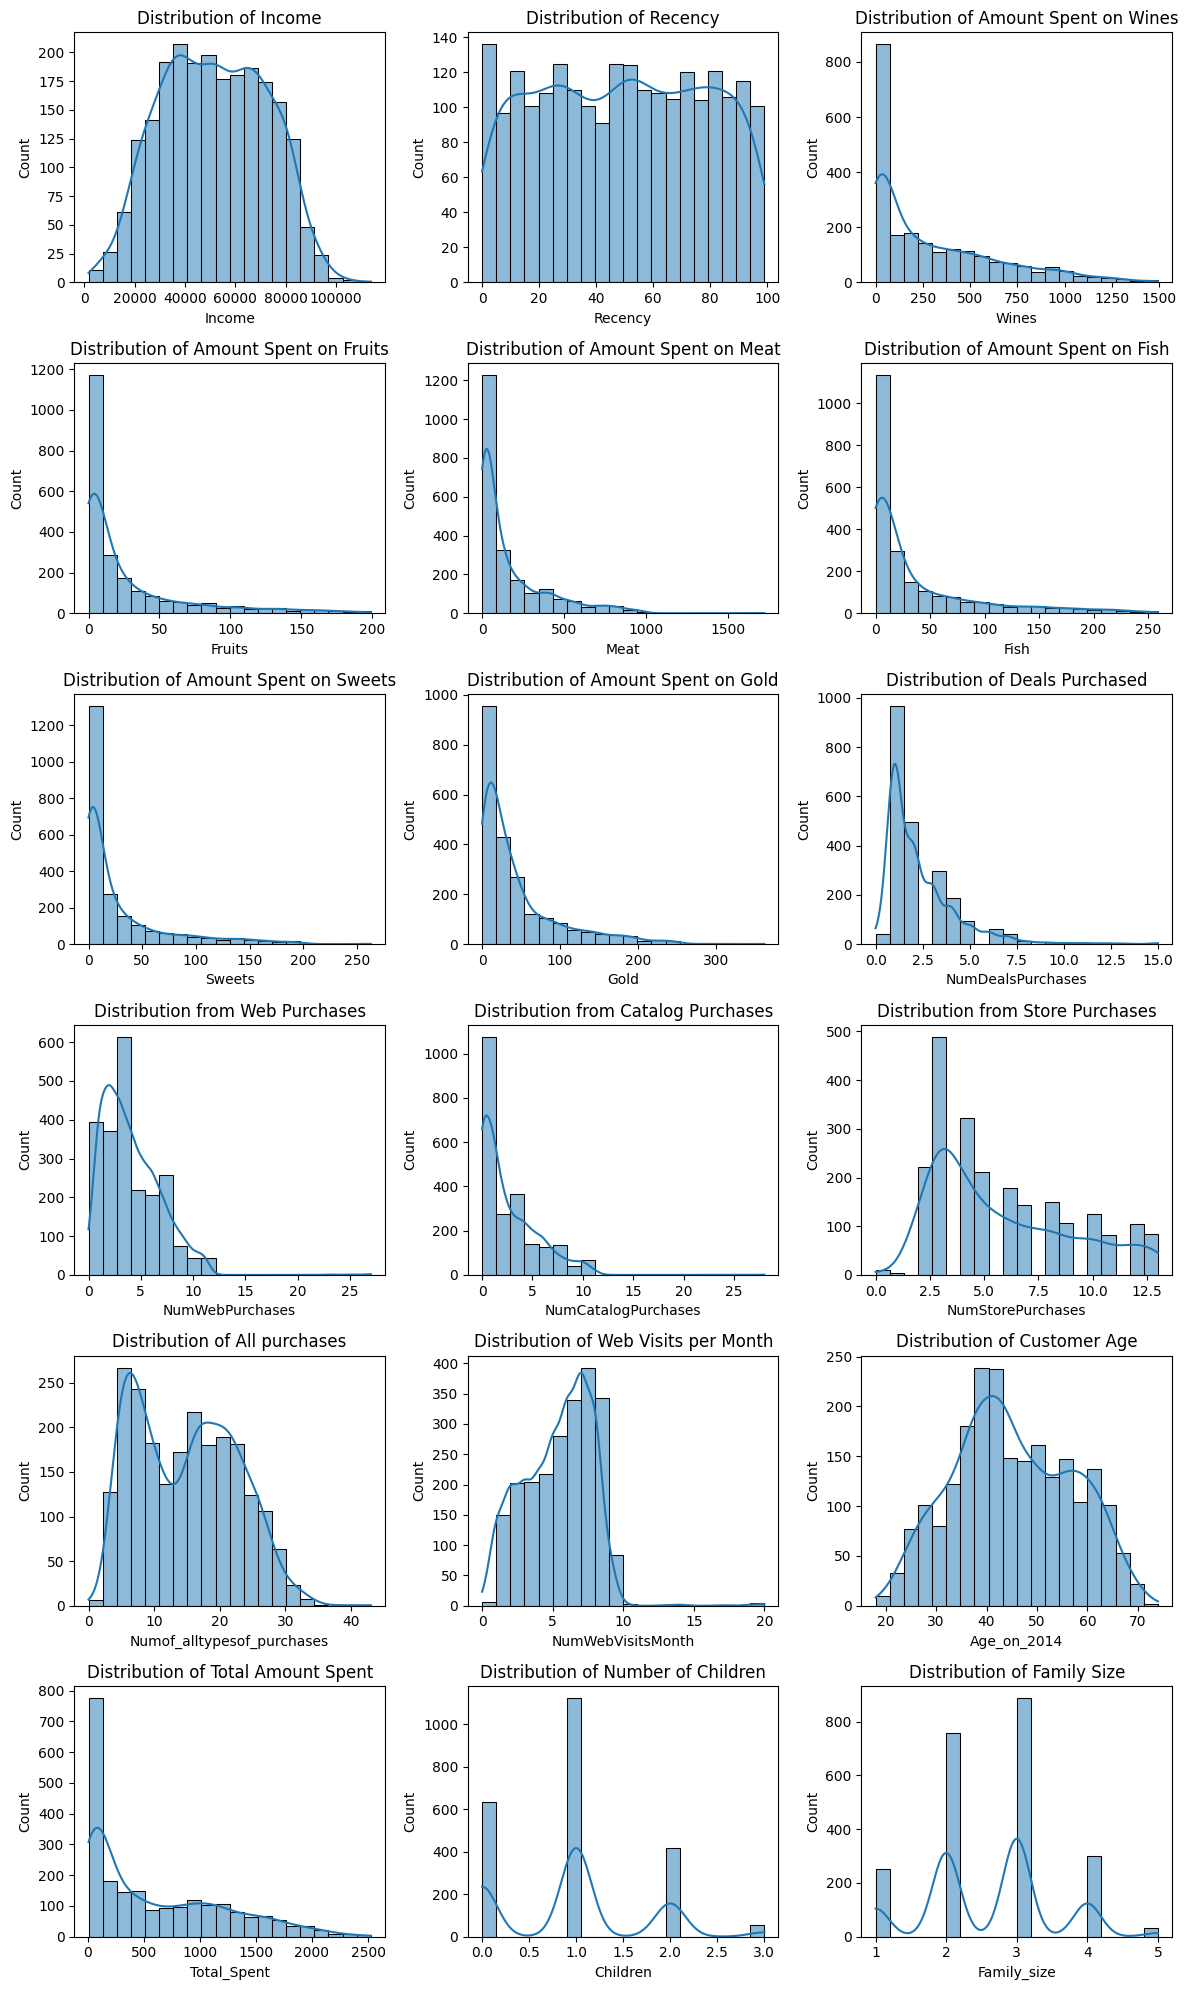

In [25]:
#Distribution of data
plt.figure(figsize=(12, 20))  # Adjusted for better visibility
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjusted spacing for clarity

# Use a loop to create each subplot
features = [
    'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
    'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'Numof_alltypesof_purchases','NumWebVisitsMonth', 'Age_on_2014', 'Total_Spent', 'Children', 'Family_size'
]
titles = [
    "Distribution of Income", "Distribution of Recency", "Distribution of Amount Spent on Wines",
    "Distribution of Amount Spent on Fruits", "Distribution of Amount Spent on Meat", "Distribution of Amount Spent on Fish",
    "Distribution of Amount Spent on Sweets", "Distribution of Amount Spent on Gold", "Distribution of Deals Purchased",
    "Distribution from Web Purchases", "Distribution from Catalog Purchases", "Distribution from Store Purchases",
    "Distribution of All purchases", "Distribution of Web Visits per Month", "Distribution of Customer Age", 
    "Distribution of Total Amount Spent", "Distribution of Number of Children", "Distribution of Family Size"
]

for i, (feature, title) in enumerate(zip(features, titles), 1):
    plt.subplot(6, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20)
    plt.title(title)

plt.tight_layout()
plt.show()


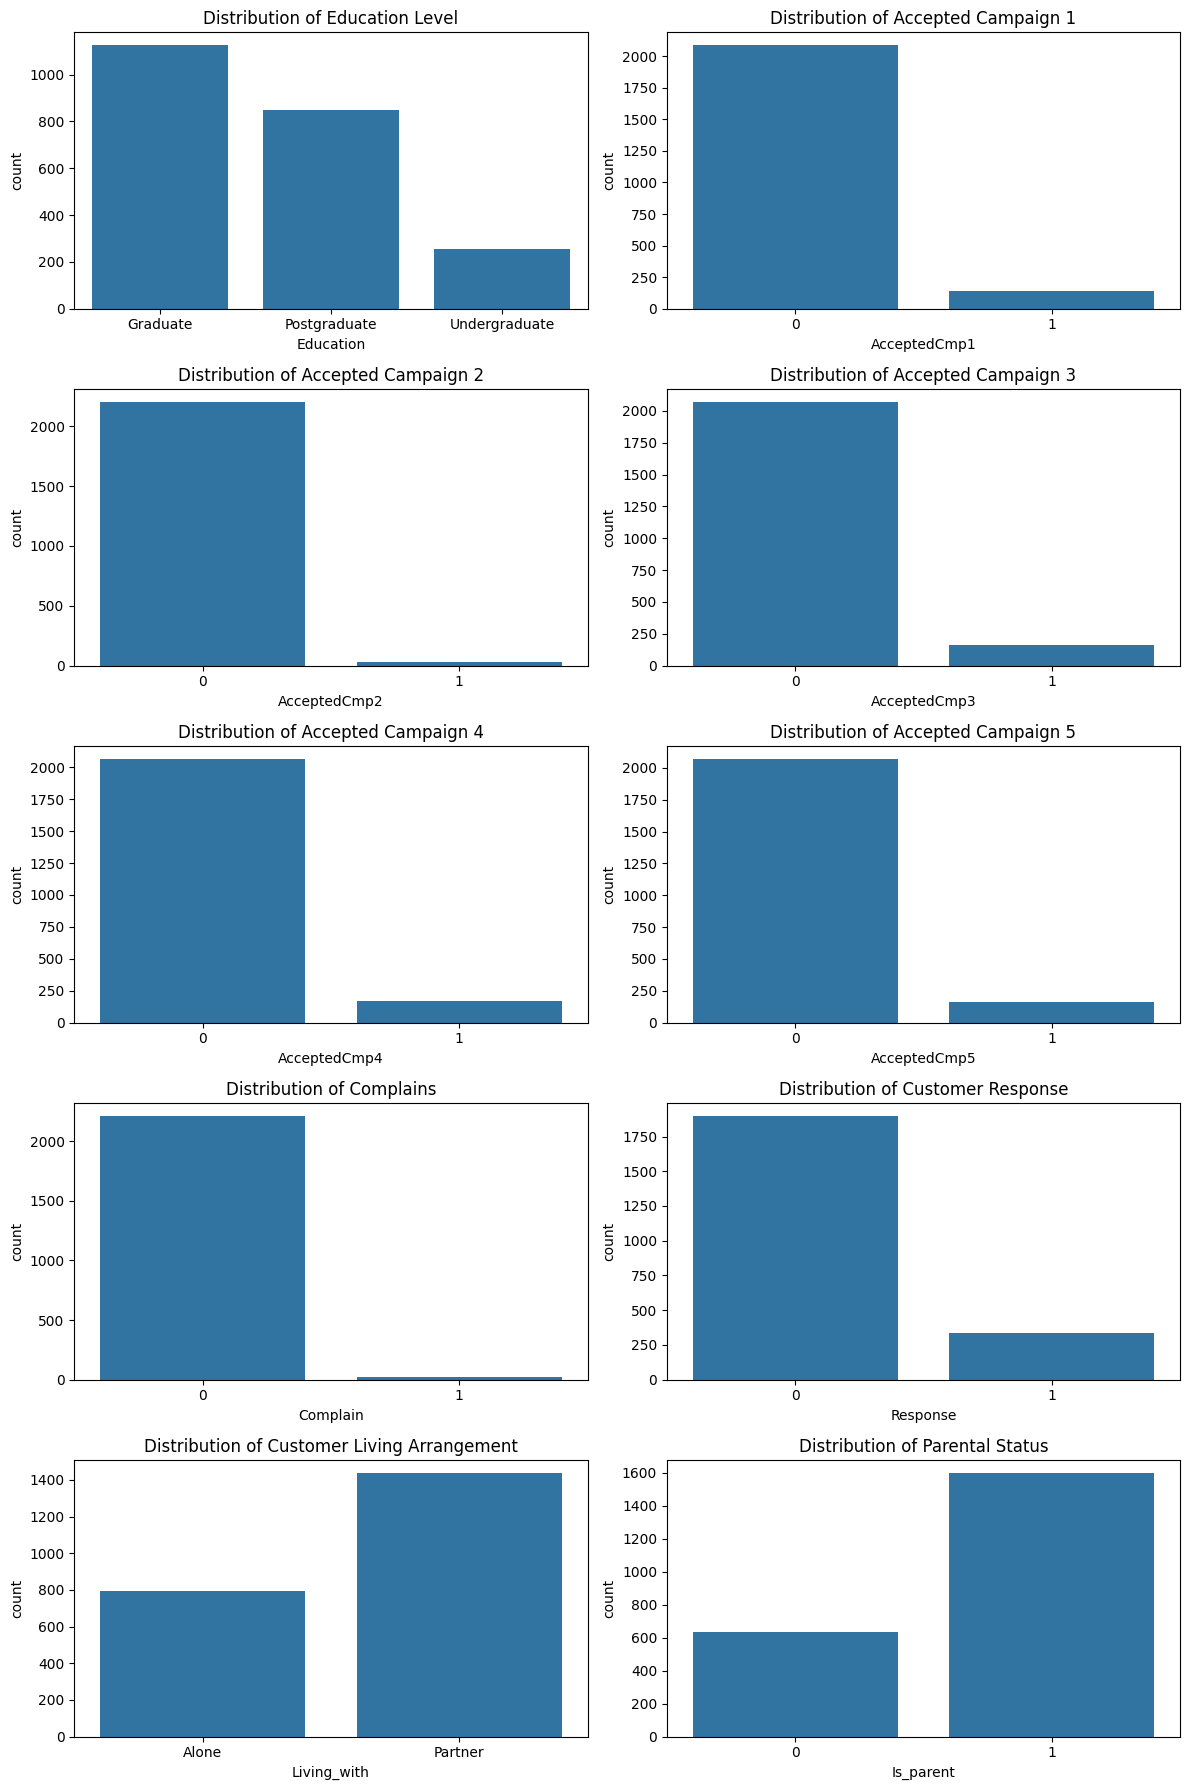

In [26]:

plt.figure(figsize=(12, 18))  # Increased the vertical size to fit all plots comfortably
plt.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust spacing to prevent overlap

# Lists of features and corresponding titles for count plots
features = [
    'Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 
    'Living_with', 'Is_parent'
]

titles = [
    "Distribution of Education Level", "Distribution of Accepted Campaign 1",
    "Distribution of Accepted Campaign 2", "Distribution of Accepted Campaign 3",
    "Distribution of Accepted Campaign 4", "Distribution of Accepted Campaign 5",
    "Distribution of Complains", "Distribution of Customer Response",
    "Distribution of Customer Living Arrangement", "Distribution of Parental Status"
]

# Use a loop to create each subplot for count plots
for i, (feature, title) in enumerate(zip(features, titles), start=1):
    plt.subplot(5, 2, i)  # Adjust subplot indexing based on total plots
    sns.countplot(data=df, x=feature) 
    plt.title(title)

plt.tight_layout()  
plt.show()


### From Distribution Plots, we can see that, Majority features are Right-skewed except Recency, Age and Family_size. ###

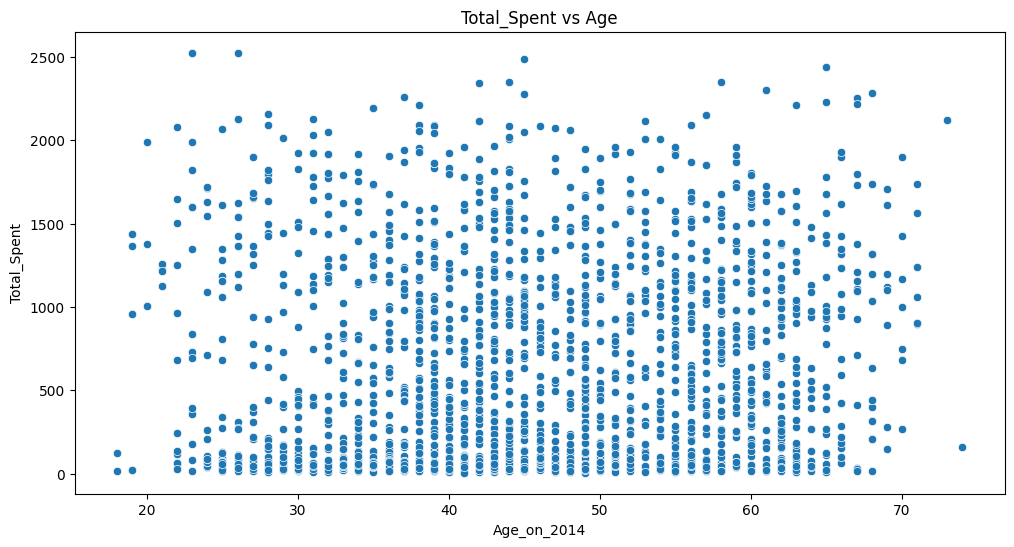


Correlation between Age_on_2014 and Total_Spent: 0.11609034791580385


In [27]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Age_on_2014', y = 'Total_Spent')
plt.title("Total_Spent vs Age")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Total_Spent: {df['Age_on_2014'].corr(df['Total_Spent'])}")

From Total_spent vs Age plot, we can see that as Age increase, Spent also increases. Correlation score is 0.114.

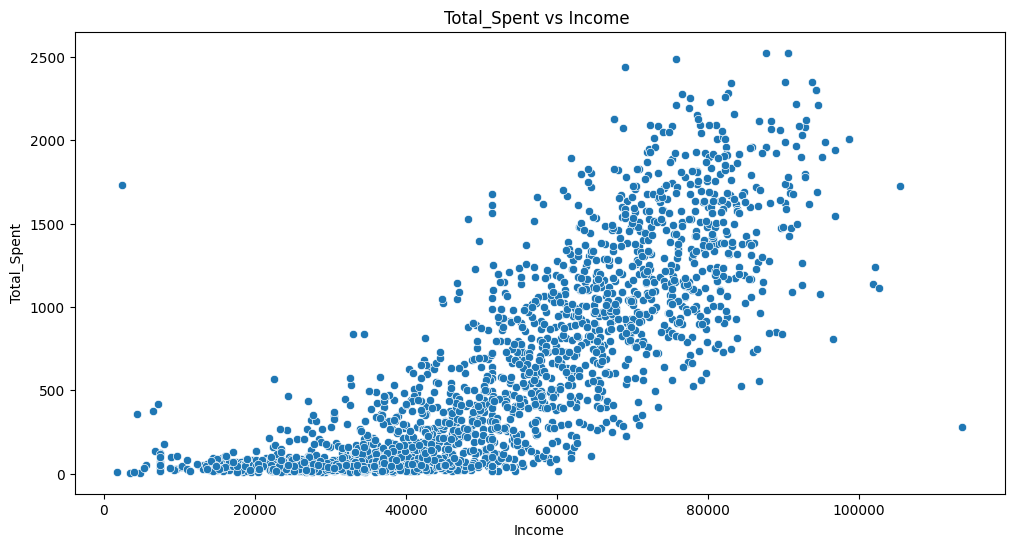


Correlation between Income and Total_Spent: 0.8202215056408393


In [28]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Total_Spent')
plt.title("Total_Spent vs Income ")
plt.show()
print(f"\nCorrelation between Income and Total_Spent: {df['Income'].corr(df['Total_Spent'])}")

From Total_Spent vs Income plot, we can see that as Income increases, Spent increases drastically. Correlation score is 0.79.

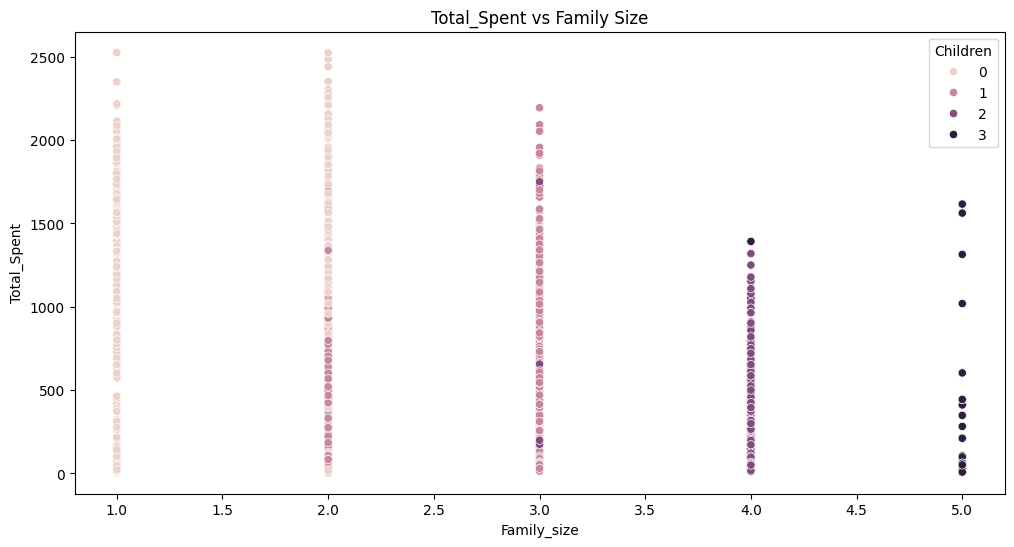


Correlation between Age_on_2014 and Total_Spent: -0.42495284568462


In [29]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Family_size', y = 'Total_Spent', hue = 'Children')
plt.title("Total_Spent vs Family Size")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Total_Spent: {df['Family_size'].corr(df['Total_Spent'])}")

From Total_Spent vs Family size plot, we can see that as Family size increase , spent decreases. Correlation score is -0.42.

In [30]:
df.groupby(['Living_with', 'Is_parent', 'Children']).agg({"Total_Spent" : ['mean']})

Total_Spent
                                       mean
Living_with Is_parent Children             
Alone       0         0         1109.747036
            1         1          462.455026
                      2          236.326241
                      3          222.904762
Partner     0         0         1104.123684
            1         1          478.683221
                      2          251.308244
                      3          308.531250

* The Mean of Spent is nearly same for customer with 0 children either he/she is  living alone or with partner.
* As the number of children increases, Mean of Spent decreases.
* Except Customer living with partner and have 3 children. Its mean is more than customer living with partner and have 2 children.

Convert Categorical variables into Numerical Variables.

In [31]:
# Check how many categorical variables are present in data
a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_with']


In [32]:
# Convert to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

Check correlation amongst the features.

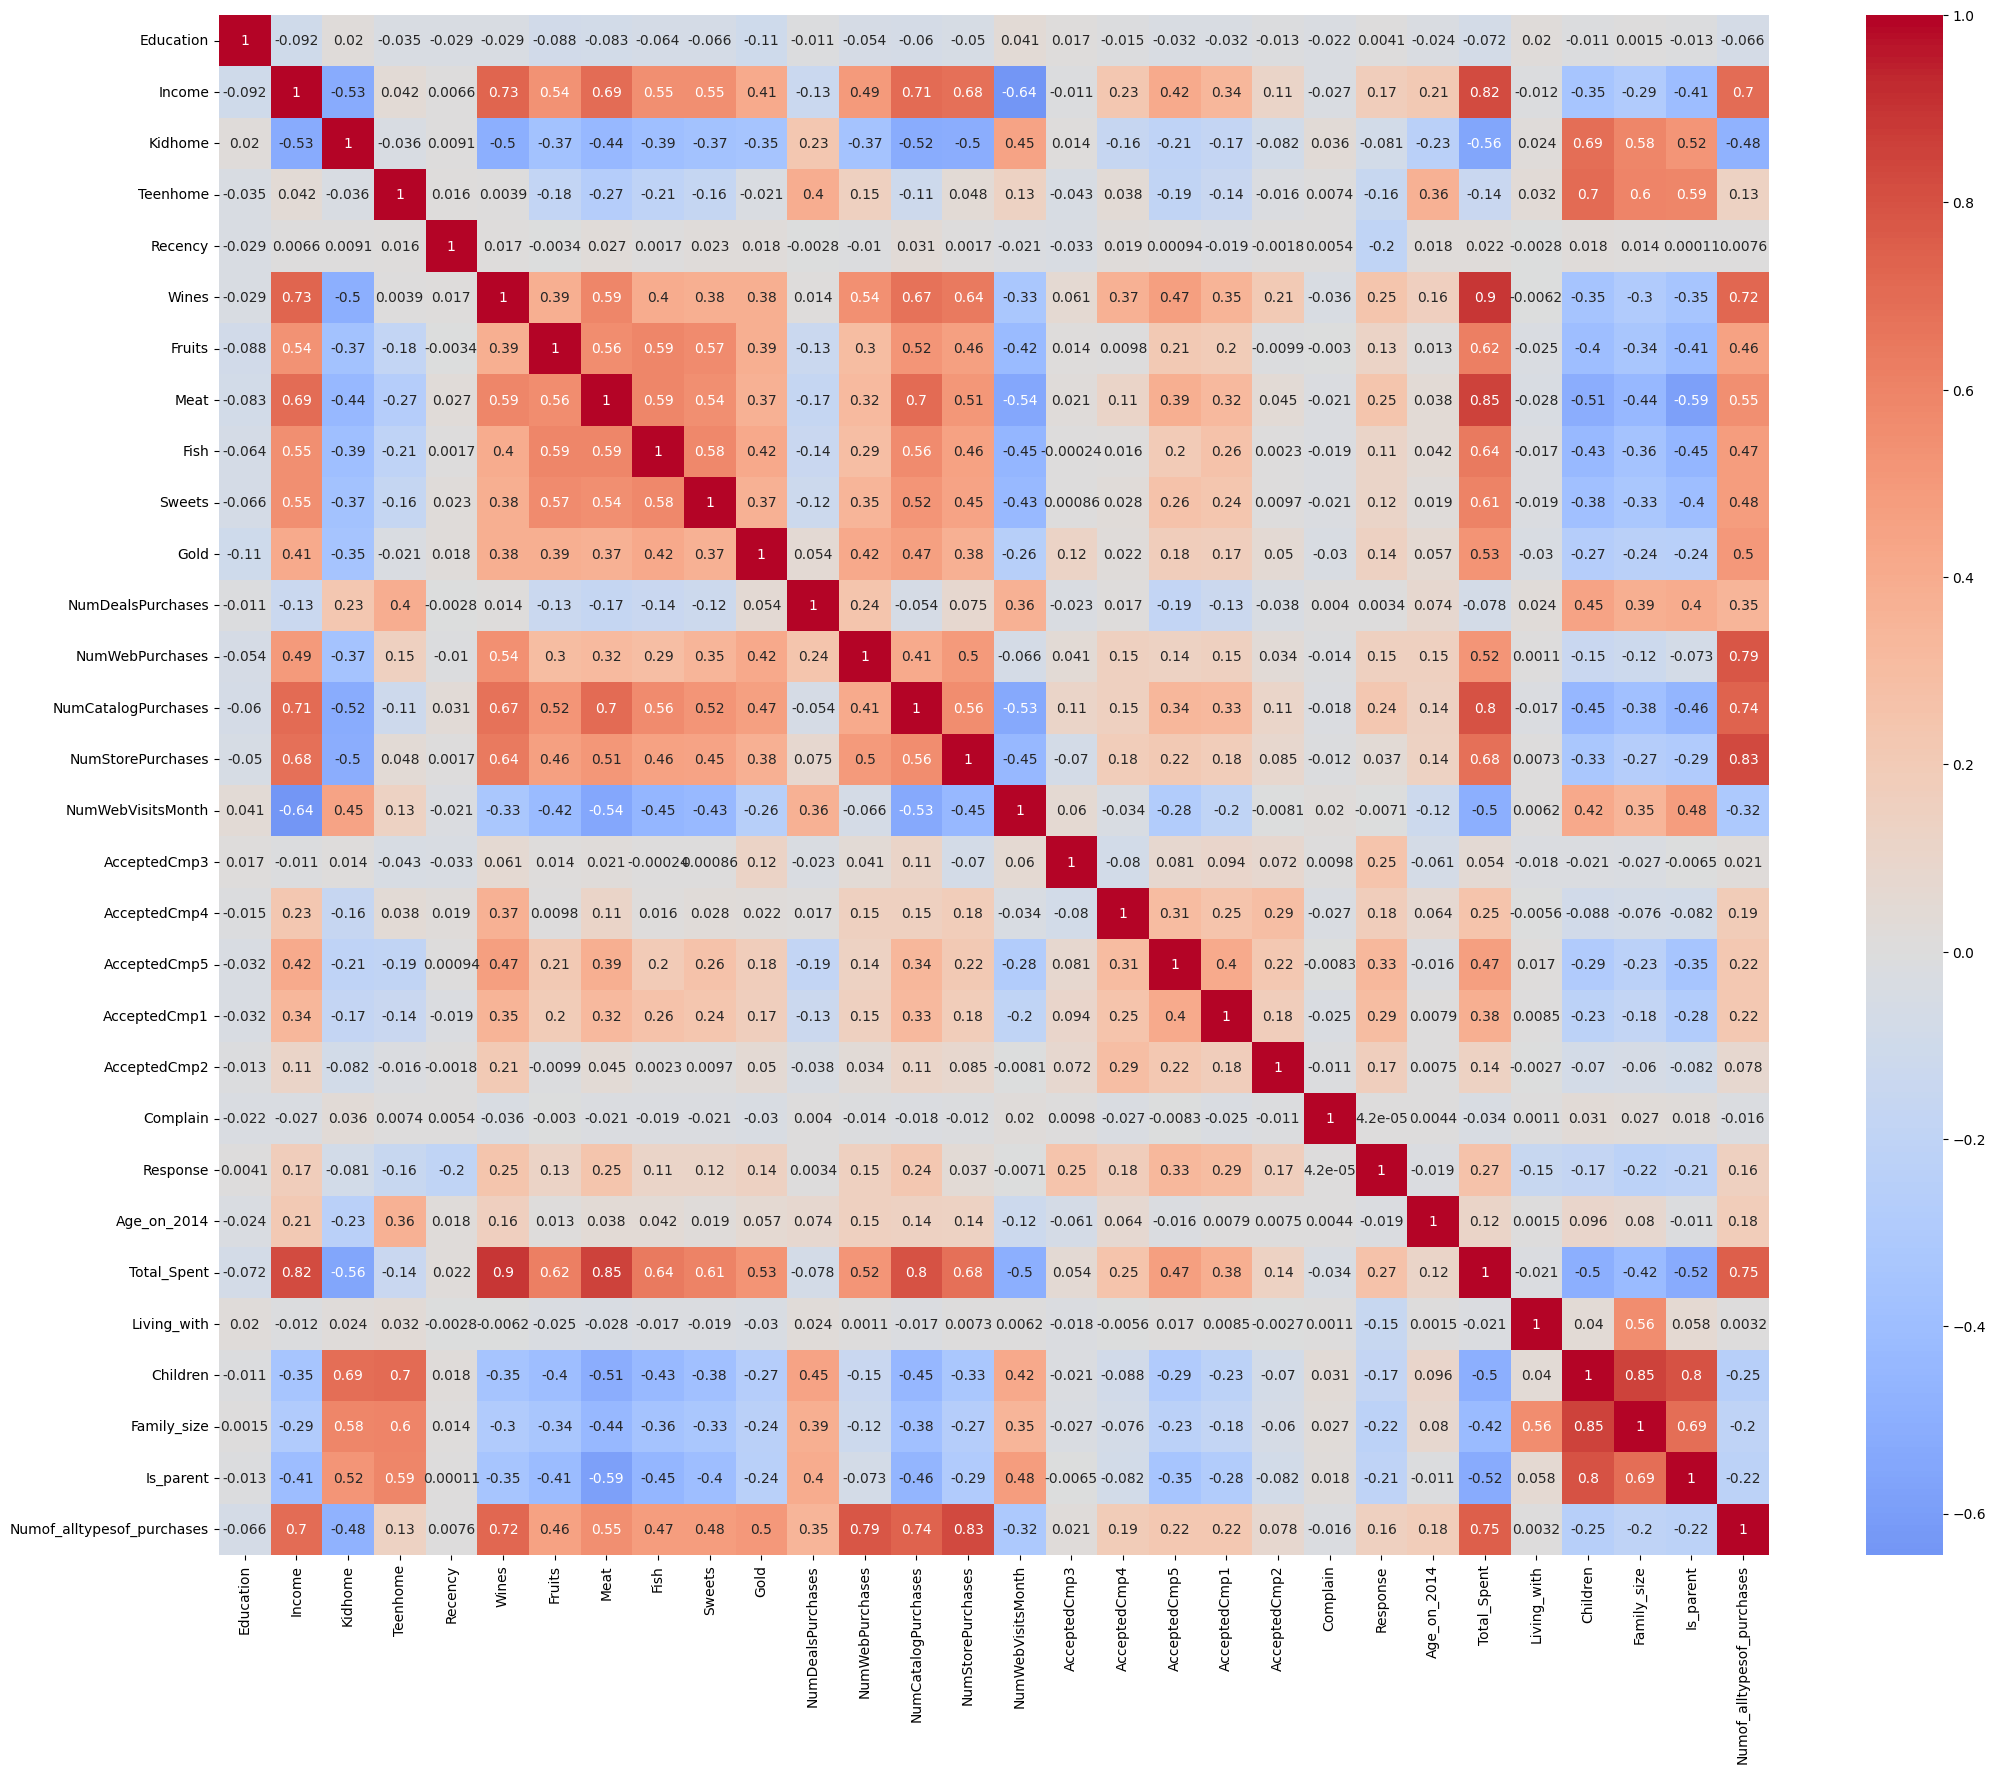

In [33]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

Here are the key takeaways from the correlation matrix:

Education and Kidhome: There seems to be a moderately negative correlation, suggesting that as the level of education increases, the number of young children at home tends to decrease.
Income and Total Spent: As expected, there's a strong positive correlation, indicating that higher income is associated with more spending.
Age and Children: There's a negative correlation, which could indicate that younger parents tend to have more children.
Wines and Total Spent: There's a positive correlation, suggesting that spending on wines contributes significantly to the total spent.
Web Purchases and Catalog Purchases: These features also show a positive correlation, suggesting that customers who buy through the web also tend to buy from catalogs.
Based on these correlations, for k-means clustering, we may want to select features that are less correlated to each other to ensure the clusters differentiate well between distinct patterns in the data. Highly correlated features might lead to redundancy

Select Features: Choose which features to include in the clustering based on their correlations and relevance to the problem statement. Typically, features with high correlations may carry redundant information, so we might want to choose a subset of features that provides diverse information about the dataset.
Scaling Data: Since k-means is sensitive to the scale of the data, standardize the features so that they have equal weight in the clustering process.
Determine the Number of Clusters: Use the Elbow Method as previously outlined to determine the optimal number of clusters. It's worth noting that the Elbow Method might not always provide a clear-cut answer, and domain knowledge can play a crucial role in deciding the final number of clusters.
Run k-Means Clustering: Perform the clustering with the selected number of clusters and the chosen features.
Analyze Clusters: Interpret the meaning of each cluster by examining their centroids. This involves looking at the average values of features within each cluster to understand what characterizes them.
Validate Clusters: Compute the silhouette score to measure how similar an object is to its own cluster compared to other clusters.
Report Findings: Summarize the findings, visualizations, and interpretations in a Jupyter notebook. Discuss any business insights or patterns that the clustering revealed.

In [34]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age_on_2014',
       'Total_Spent', 'Living_with', 'Children', 'Family_size', 'Is_parent',
       'Numof_alltypesof_purchases'],
      dtype='object')

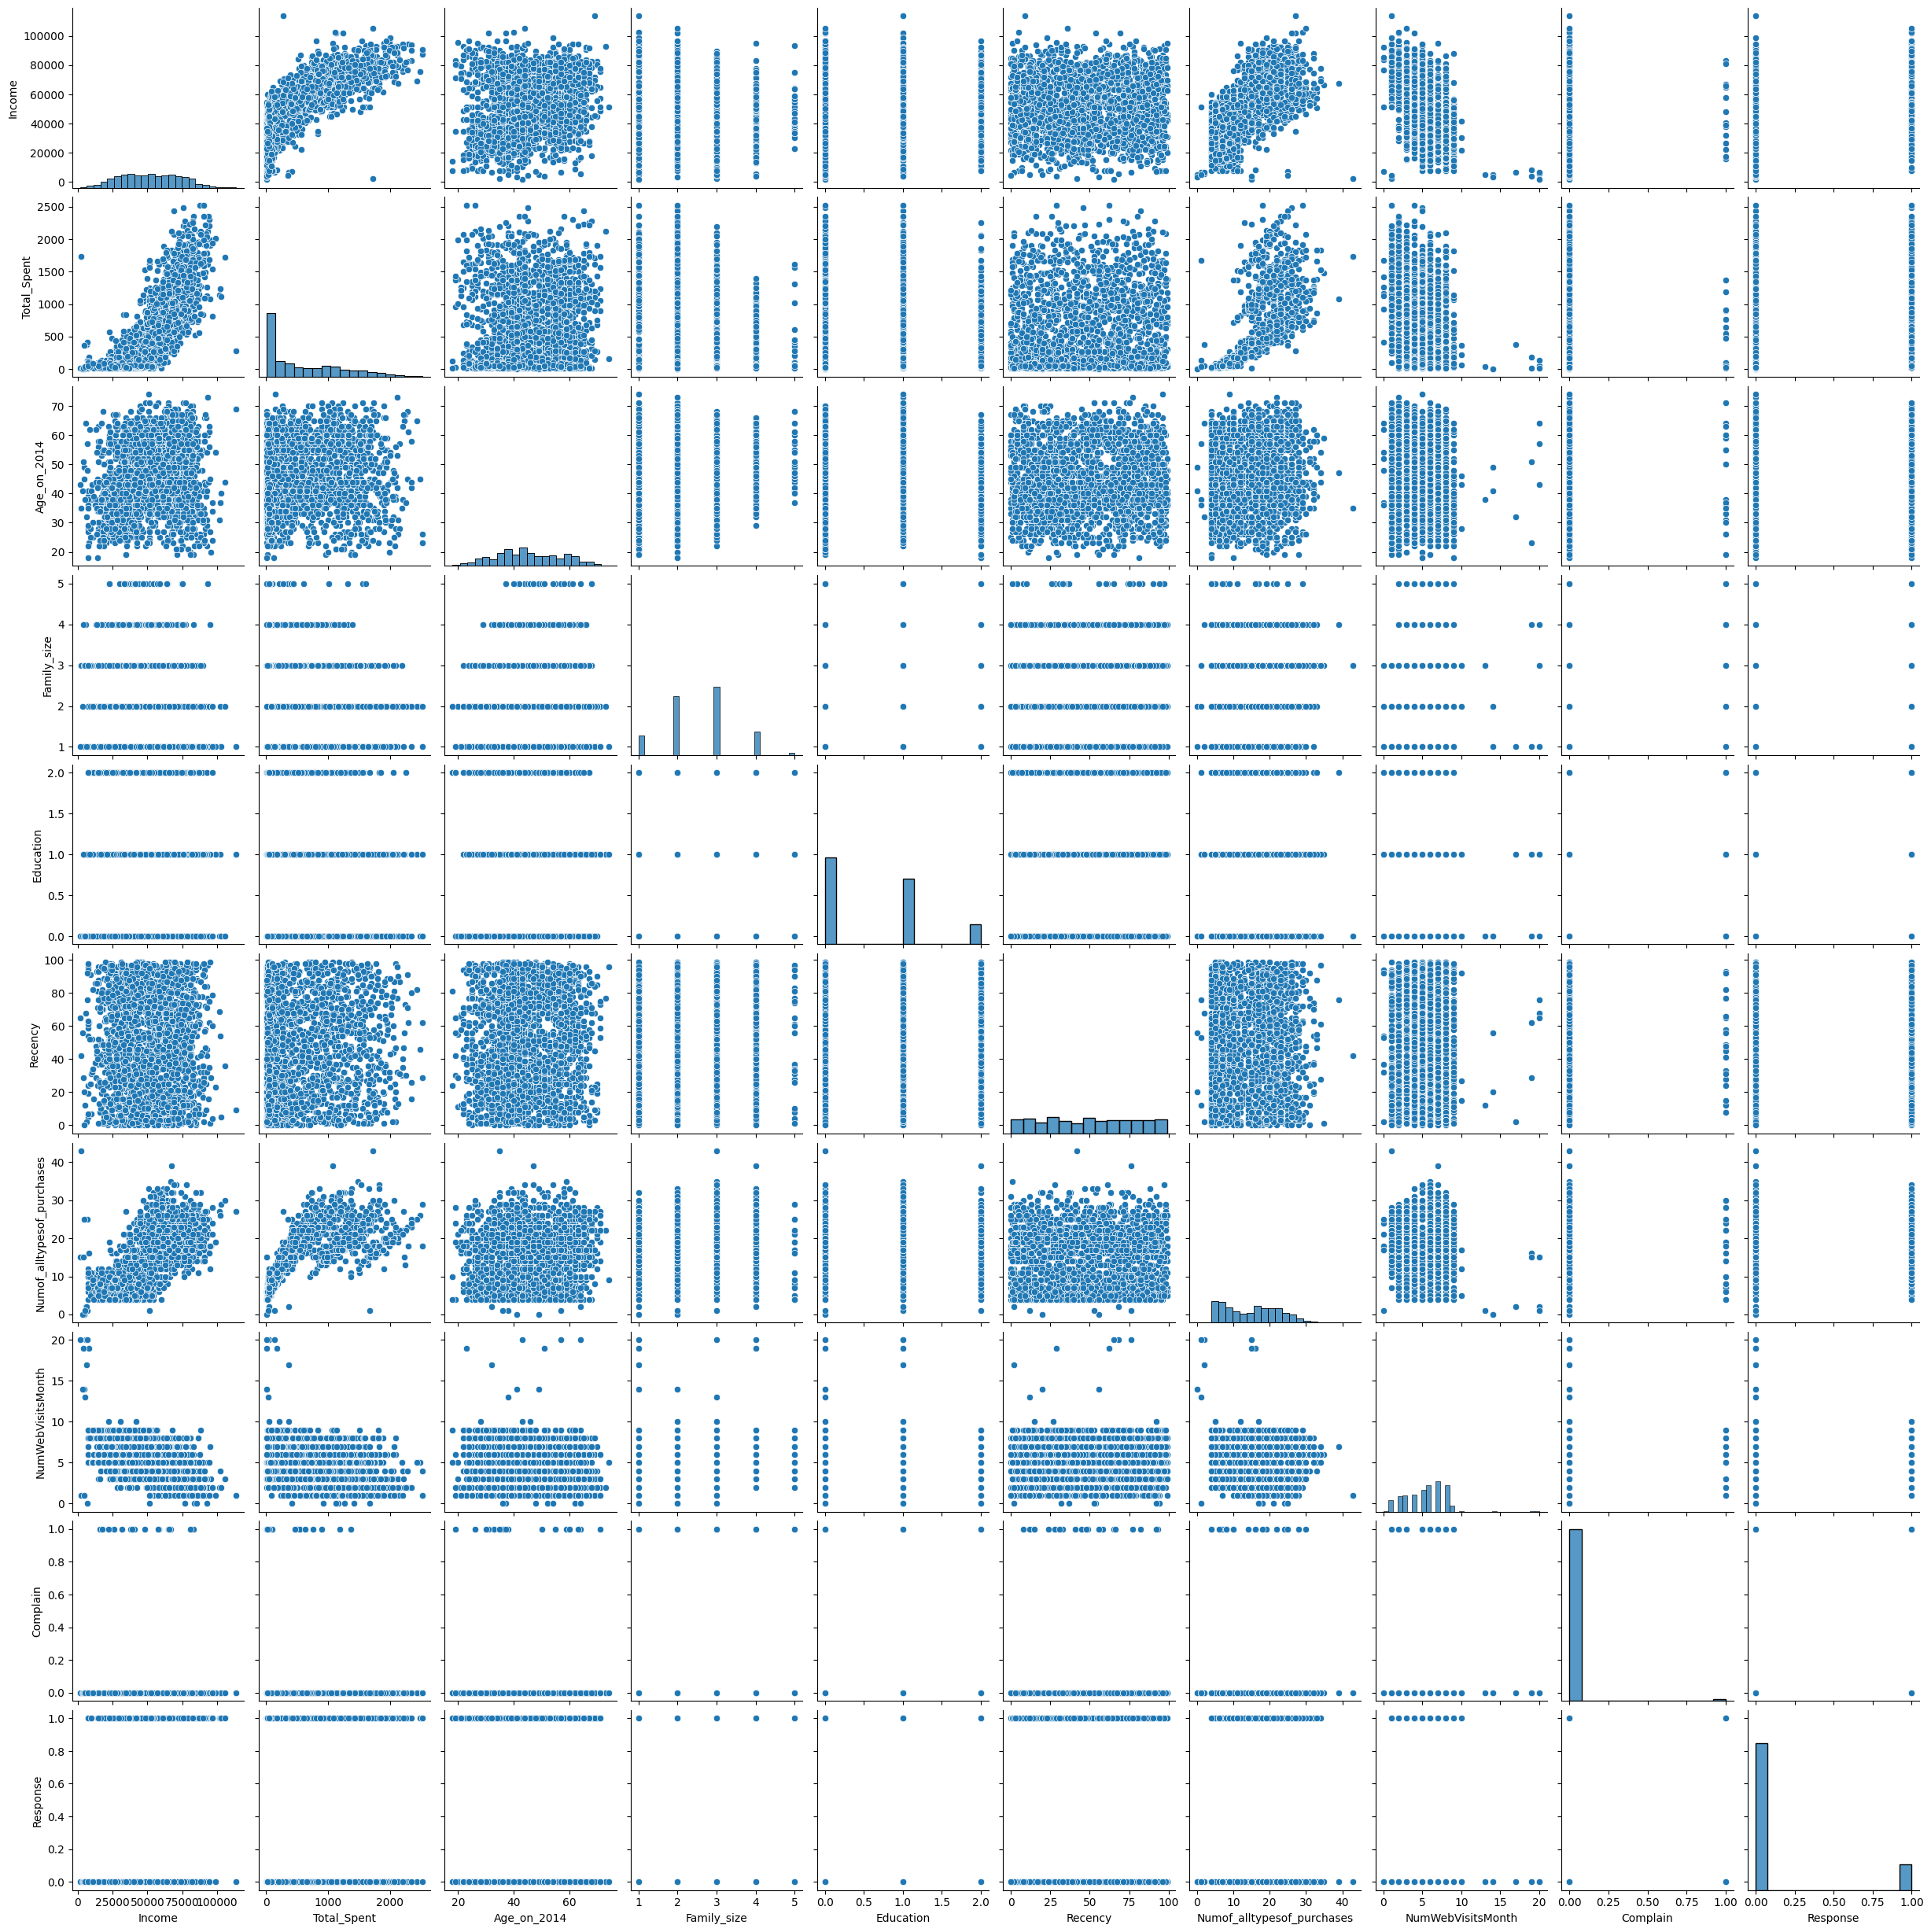

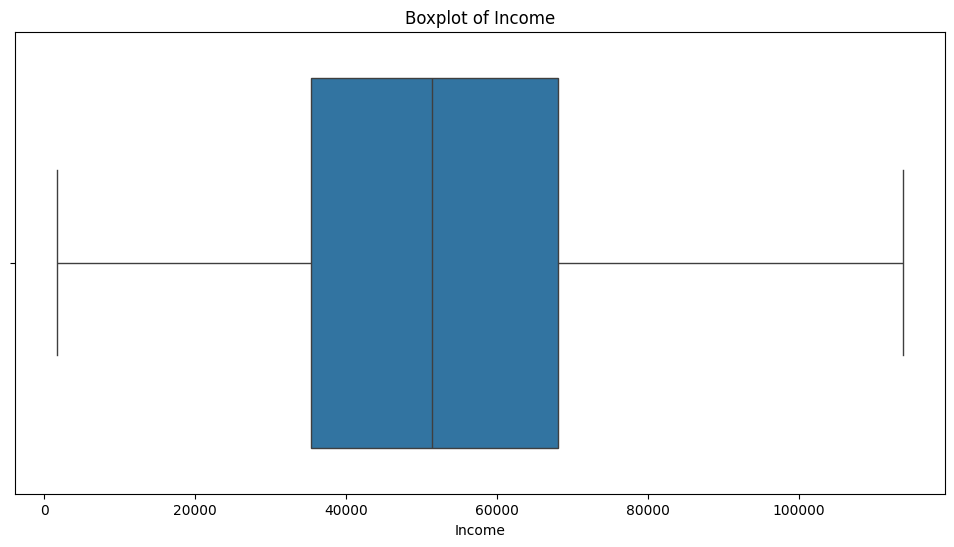

In [35]:
# Pair plots to observe the relationships between key variables
sns.pairplot(df[['Income', 'Total_Spent', 'Age_on_2014', 'Family_size','Education' ,'Recency','Numof_alltypesof_purchases', 'NumWebVisitsMonth', 'Complain', 'Response']])
plt.show()

# Box plots to check for outliers in key variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Income')
plt.title("Boxplot of Income")
plt.show()


Data Scaling

In [36]:
# Feature selection based on correlation insights
X_selected_features = df[['Income', 'Numof_alltypesof_purchases', 'Age_on_2014',
       'Total_Spent', 'Family_size']]



In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_features)


In [38]:
X_scaled 

array([[ 0.31648415,  1.32944442,  1.01571456,  1.68324736, -1.75945931],
       [-0.25613478, -1.16383787,  1.27201959, -0.96279508,  0.44505716],
       [ 0.97071852,  0.80454288,  0.33223448,  0.28367397, -0.65720107],
       ...,
       [ 0.26030982,  0.54209212, -1.03472567,  1.05751657, -1.75945931],
       [ 0.85574806,  1.06699365,  1.10114957,  0.39517387,  0.44505716],
       [ 0.06066516, -0.50771095,  1.27201959, -0.72148932,  1.5473154 ]])

In [39]:
from sklearn.cluster import KMeans
k_means=KMeans()
k_means.fit(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [40]:
k_means=KMeans(n_clusters=5)
k_means.fit_predict(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, ..., 3, 4, 2], dtype=int32)

5. Formulate Two Questions for k-means Analysis
Before starting the analysis, let's consider two questions that k-means clustering could help answer:

Customer Segmentation Question: Can we identify distinct segments within our customer base that have similar purchasing behaviors and demographic features?
Marketing Strategy Question: Are there identifiable groups of customers that respond similarly to marketing campaigns, and how do their purchasing patterns and demographics differ?


### 6. Determining the Number of Clusters (Elbow Method) ###


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

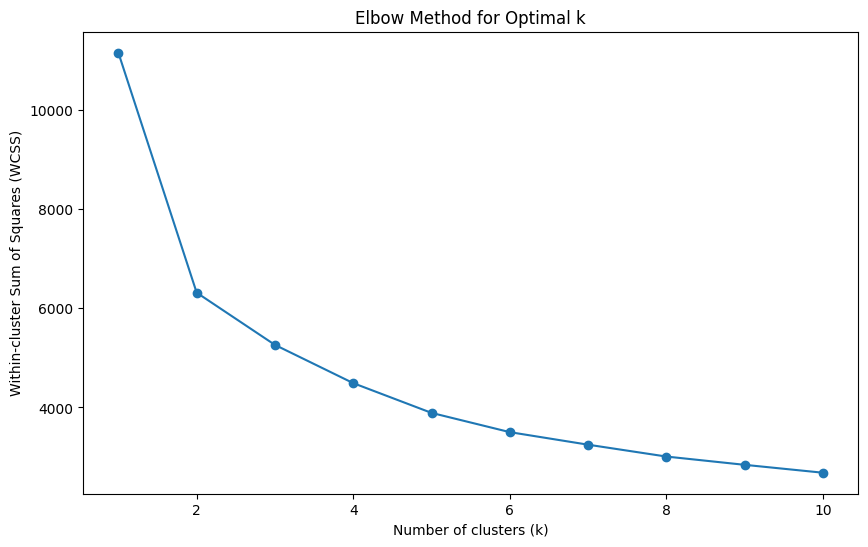

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 'X_scaled' is the scaled data ready for clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()


In [42]:
# 7. Optimal number of clusters chosen to be 2 from above plot
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Include Mathematical Formulas and Graphs Representing Final Outcomes

In your report, you should include the following formulas and graphs:
•	WCSS Formula: WCSS=∑i=1k∑x∈Si(∣∣x−μi∣∣2), where Si is the set of all data points in cluster i, and μi  is the centroid of Si.
•	Silhouette Score Formula: s=b−a/max(a,b), where a is the mean intra-cluster distance and b is the mean nearest-cluster distance for each sample.


In [43]:
# Analyze the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=X_selected_features.columns)
print(centroid_df)

# Compare the clusters' mean values
cluster_comparison = df.groupby('Cluster').mean()
print(cluster_comparison)


         Income  Numof_alltypesof_purchases  Age_on_2014  Total_Spent  \
0  36562.305945                    9.221305    43.153592   142.789430   
1  69531.358055                   21.587426    47.440079  1156.024558   

   Family_size  
0     2.907514  
1     2.225933  
         Education        Income   Kidhome  Teenhome    Recency       Wines  \
Cluster                                                                       
0         0.649876  36562.305945  0.723369  0.515277  49.061932   66.992568   
1         0.562868  69531.358055  0.112967  0.498035  49.159136  588.111984   

            Fruits        Meat       Fish     Sweets  ...  AcceptedCmp2  \
Cluster                                               ...                 
0         6.366639   32.668869   9.492155   6.474814  ...      0.001652   
1        50.118861  323.041257  71.129666  51.770138  ...      0.027505   

         Complain  Response  Age_on_2014  Total_Spent  Living_with  Children  \
Cluster                        

Cluster 0: Budget-Conscious Larger Families
Income: Lower average income ($36,562), which suggests that customers in this cluster might be more budget-conscious.
Purchasing Behavior: Fewer types of purchases (around 9 on average), indicating a more selective or constrained purchasing behavior.
Age: Younger customers on average (around 43 years old).
Total Spent: Lower overall spending ($142.79), consistent with lower income and fewer purchases.
Family Size: Larger family size (average of 2.9), possibly indicating more dependents and a potential focus on family-oriented products and services.
Is_parent: A higher likelihood of being parents (88% are parents), correlating with the larger family size.
Response to Marketing: Lower response rate to marketing campaigns (around 9%), perhaps indicative of a need for more targeted marketing or different types of promotions.

Cluster 1: Affluent, Active Shoppers with Smaller Families
Income: Higher average income ($69,531), which could indicate a higher disposable income and financial flexibility.
Purchasing Behavior: More frequent purchases across all types (average of around 22), showing a tendency towards more diverse and frequent shopping habits.
Age: Slightly older customer group (around 47 years old).
Total Spent: Significantly higher total spending ($1,156), aligning with the higher income and number of purchases.
Family Size: Smaller families (average size of 2.2), which might suggest fewer dependents and possibly more spending per capita on non-essential goods.
Is_parent: Fewer parents (around 52%), which fits with the smaller family size and might influence the types of products and services they are interested in.
Response to Marketing: Higher response rate to marketing campaigns (around 21%), indicating they are more engaged and perhaps influenced by marketing efforts.
Insights and Strategic Implications

Cluster 0 might benefit from marketing strategies that focus on value for money, discounts, bulk buying options, and family packs due to their lower income and larger family size.

Cluster 1 represents a prime target for premium and diverse products, given their higher income and spending. They're also more responsive to marketing, so tailored promotions, loyalty programs, and exclusive offers might be particularly effective for this group.
By understanding these customer segments, businesses can tailor their marketing strategies to each cluster's unique needs and preferences. For example, customers in Cluster 0 may be targeted with promotions that emphasize value and savings, while customers in Cluster 1 may be more receptive to a wider range of products and less sensitive to price.

This clustering analysis allows for more personalized customer engagement, potentially leading to increased customer satisfaction and loyalty. It also provides the business with insights into how to allocate resources effectively to maximize return on investment in marketing and product development.

8. Interpret the results in the context of the questions asked

1.Customer Segmentation Based on Purchasing Behavior and Demographics
Question: Can we identify distinct segments within our customer base that have similar purchasing behaviors and demographic features?

Interpretation: Yes, the clustering has revealed two distinct segments:

Cluster 0 (Budget-Conscious Families):
Demographics: This group seems to be younger with an average age of 43.5 and larger families. The high number of children suggests these are households with parents.
Purchasing Behavior: They have significantly lower spending across all product categories, possibly due to a more limited disposable income, as indicated by the lower average income of around $38,559.
Marketing Insights: These customers are less responsive to marketing campaigns, indicating that different strategies or value-focused messages might be more effective.
Cluster 1 (Affluent Spenders):
Demographics: This group is slightly older with an average age of 47.5 and smaller family sizes. There are fewer children in these homes, which could mean older or no children.
Purchasing Behavior: They have a higher disposable income with an average income of $72,513, and their spending is substantially higher, particularly on wines, which could indicate a taste for luxury or premium products.
Marketing Insights: They respond well to marketing campaigns, suggesting they are more open to trying new products or promotions and can be targeted with premium offerings.
These insights allow us to address the customer segmentation question by confirming that we can indeed identify distinct customer segments with unique purchasing behaviors and demographic features.

2. Marketing Strategy and Customer Response
Question: Are there identifiable groups of customers that respond similarly to marketing campaigns, and how do their purchasing patterns and demographics differ?

Interpretation: The analysis allows us to conclude that:

Cluster 0: This segment is less responsive to marketing campaigns. Marketing strategies for this cluster should possibly focus on cost-effectiveness and family benefits. Since their spending is lower, they might be attracted to discounts and bundled offers that provide more value.
Cluster 1: This segment is more receptive to marketing campaigns, likely due to their higher income and willingness to spend more. Tailored marketing strategies that highlight exclusivity and quality, such as limited-time offers on premium products or loyalty program benefits, may be effective for this group.
In conclusion, the k-means analysis effectively answers the questions by showing that customer purchasing behaviors and responses to marketing campaigns do indeed vary among different segments. This valuable information can guide targeted marketing efforts, sales strategies, and customer experience improvements.

9. Minimizing Variation Within Clusters:
The variation within the clusters has been minimized by the k-means algorithm itself, which iteratively adjusts the position of the centroids to decrease the sum of the squared distances between each point and the centroid of its assigned cluster.

## 10. Validation of model using Silhouette Score ##

In [44]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.38


The silhouette score provides a measure of how similar an individual is to their own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:

A score of 1 denotes the perfect clustering, with the data point being very close to other points in its cluster and far away from the next nearest cluster.
A score of 0 indicates that clusters are overlapping.
A score of -1 indicates that data points have been assigned to the wrong clusters.
A silhouette score of 0.38, suggests that the clusters are, on average, moderately separated and cohesive. This means that the clusters are neither poorly defined nor highly distinct. In the context of customer segmentation, the score indicates that while the model has found some structure in the data, there may still be some overlap between clusters, or the clusters may not be very far from each other in the feature space.

This level of silhouette score is relatively common in real-world data, which is often not as cleanly separable as textbook examples. With this in mind, the interpretation would be:

The clustering is generally reasonable, and there are indeed patterns in the data that the k-means algorithm has capitalized on to segment the customer base.
However, there is room for improvement. Either the features used for clustering could be refined, additional features could be included, or another algorithm that can handle more complex cluster shapes might perform better.
Further analysis of the clusters may reveal some "borderline" cases, customers who sit near the decision boundary between clusters. Special attention to these cases might yield insights into how to adjust the features or the number of clusters to improve the score.
With this silhouette score, it is also recommended to validate the clusters qualitatively. This involves looking at the customer profiles within each cluster and considering if they make sense intuitively or align with known customer personas. If the clusters align well with business understanding or potential marketing strategies, then the score supports that the clustering may be practically useful despite not being perfect.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette_score is : 0.38


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the average silhouette_score is : 0.28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the average silhouette_score is : 0.25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the average silhouette_score is : 0.26


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the average silhouette_score is : 0.27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the average silhouette_score is : 0.25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the average silhouette_score is : 0.25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the average silhouette_score is : 0.24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the average silhouette_score is : 0.25


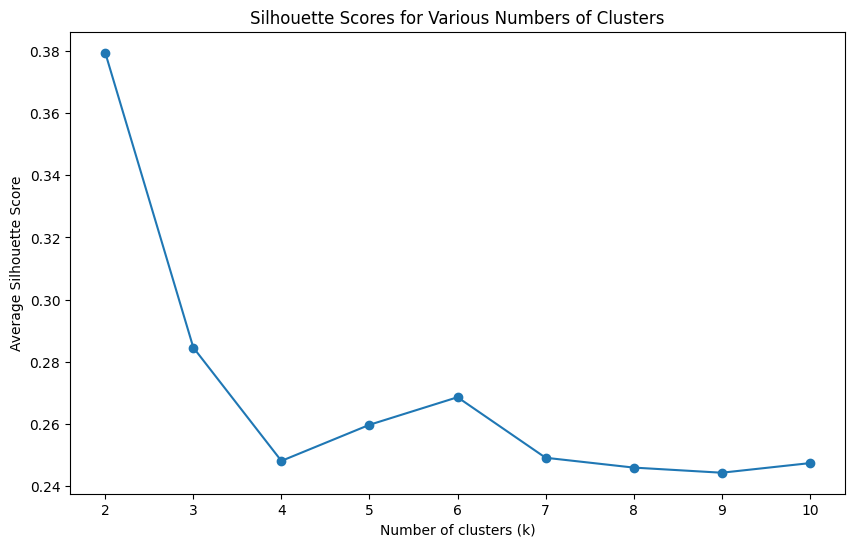

In [45]:
from sklearn.metrics import silhouette_score

# List to hold the average silhouette scores for each k
silhouette_avgs = []

# Range of k values to compute silhouette score from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Silhouette score gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.2f}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_avgs, marker='o')
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()


The average silhouette score for various numbers of clusters ranging from 2 to 10. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with a higher score indicating better-defined clusters.

Here's an interpretation of your silhouette score plot:

The highest silhouette score is achieved when the number of clusters k is 2, with the score being around 0.38. This suggests that when the data is partitioned into two clusters, the clusters are more distinct from each other compared to any other number of clusters tested.
The score drops significantly when moving from 2 to 3 clusters, indicating that the separation between clusters is not as clear with 3 clusters.
From k=3 onwards, the silhouette scores tend to fluctuate but generally show a downward trend, indicating that increasing the number of clusters beyond 2 does not lead to more distinct or better-separated clusters.
The scores are relatively low overall, suggesting that while 2 clusters are the best among the tested solutions, the clusters may still have some overlap or the clustering structure may not be very strong.
Given these insights, it would be reasonable to conclude that the dataset is best described by two main clusters. This is supported by the fact that the silhouette score is highest for k=2. The decrease in silhouette score as the number of clusters increases beyond two indicates that additional clusters do not capture substantial new information or meaningful distinctions between data points.

In practical terms, this suggests that for the purpose of customer segmentation, two distinct groups are identified within the customer base. It's important to note that while the silhouette score for two clusters isn't very high (close to 1), it's still indicative of a reasonable structure in the data that k-means was able to capture.

However, considering the highest silhouette score is only 0.38, there may still be significant overlap between the clusters, and they are not perfectly distinct. This could also suggest that the data does not naturally cluster into well-separated groups, or that k-means — which assumes spherical clusters of approximately equal size — may not be the best model for this particular dataset.

In conclusion, based on the silhouette scores, the decision to segment the customer base into two clusters would be justified, although the actual separation between the clusters might not be very distinct. Additional analysis, possibly using different clustering algorithms or incorporating domain knowledge, could be explored to further validate or refine the customer segmentation.

11. Mathematical Formulas:

1.Euclidean Distance: The standard distance metric used in k-means for assigning points to the nearest centroid. D(x,y)=(x1−y1)2+(x2−y2)2+⋯+(xn−yn)
2.Within-cluster Sum of Squares (WCSS): It quantifies the variance within a cluster and is minimized in k-means clustering. WCSS=∑i=1k∑x∈Ci∣∣x−μi∣∣Where k is the number of clusters, Ci   is the set of points in the ith cluster, x is a data point, and μi is the centroid of the ith cluster.
3.Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. s(i)=b(i)−a(i)max⁡{a(i),b(i)} For each point i, a(i) is the average distance from i to the other points in the same cluster, and b(i) is the smallest average distance from i to points in a different cluster, minimized over clusters.

Graphs Representing Final Outcomes:
1. Elbow Method Graph: Shows the WCSS for different numbers of clusters and helps to determine the optimal number of clusters.
2. Hist plot: Distribution of the individual feature.
3. Count plot: The bar plot displays the distribution of the classes. 
4. Scatter plot: To find the relationship between univaiate variables
5. Heat map: To fint the correlation among the features




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


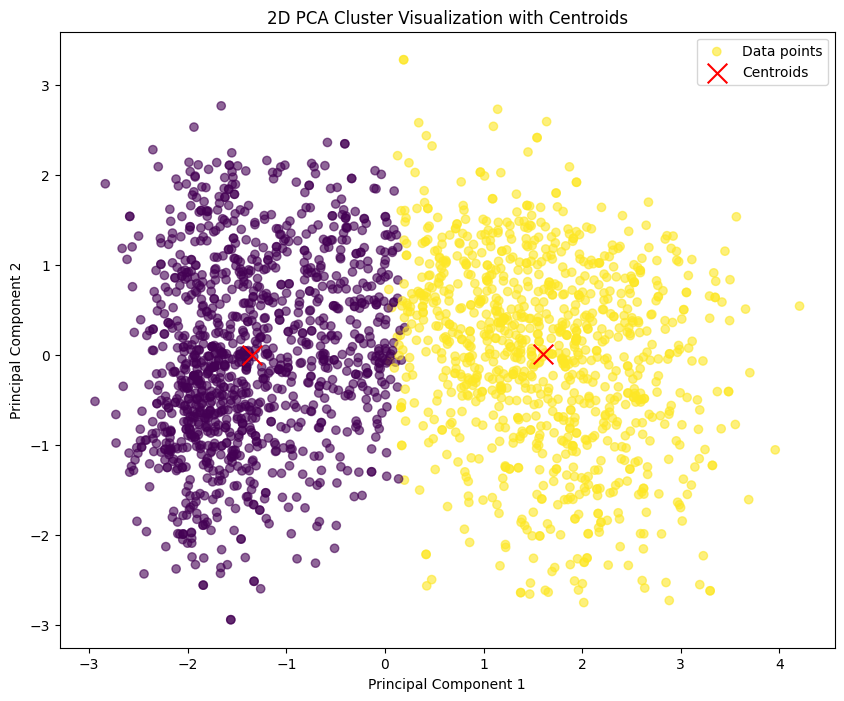

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Let's assume you have determined the optimal number of clusters to be 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Perform PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Get the centroids
centroids = pca.transform(kmeans.cluster_centers_)

# Plot the clustered data
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('2D PCA Cluster Visualization with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Hierarchical Clustering
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. The two main types are:

Agglomerative (Bottom-up approach): Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive (Top-down approach): All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
The key intuition behind hierarchical clustering is that you can represent data by its similarities (in agglomerative) or differences (in divisive) in a tree-like diagram called a dendrogram, which visually shows the hierarchy of clustering and the sequence of cluster merging or splitting.

Mathematical Formulation:
Clusters are formed based on a distance or similarity matrix, and at each iteration, the algorithm must update this matrix to reflect the distances between the new clusters. The choice of distance metric (Euclidean, Manhattan, etc.) and the linkage criteria (the rule used to decide when to merge clusters) significantly affect the output:

Single Linkage: The distance between two clusters is defined as the shortest distance between two points in each cluster.
Complete Linkage: The distance between two clusters is defined as the longest distance between two points in each cluster.
Average Linkage: The distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.
Ward's Method: The distance between two clusters is the sum of squared differences within all clusters. This is also known as the increment of the sum of squares or the Ward's criterion.


2. Hierarchical Clustering
Hierarchical clustering creates a tree of clusters called a dendrogram, which can be useful to visualize and decide on the number of clusters by cutting the tree at a certain level.

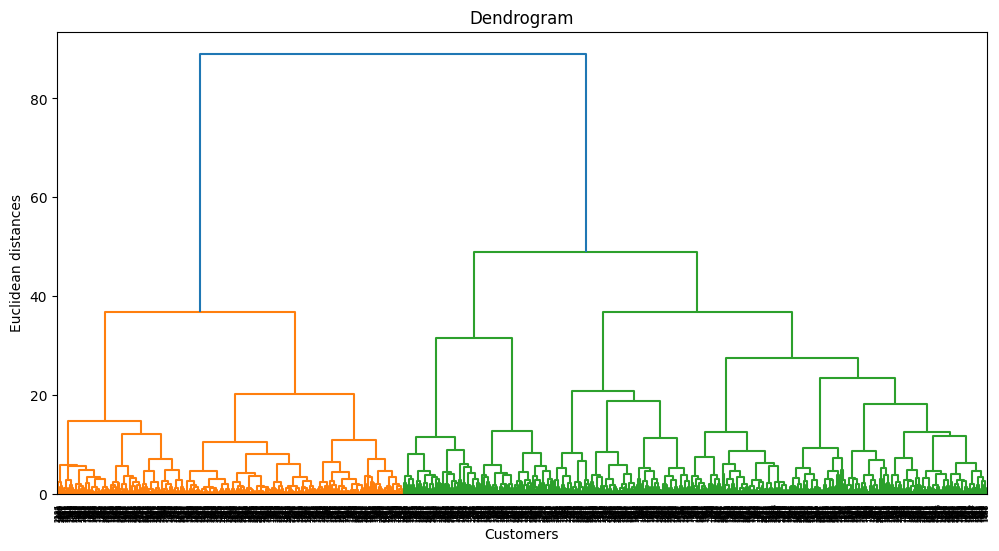

In [47]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plotting dendrogram to find optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [48]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical_labels = hc.fit_predict(X_scaled)

# Adding hierarchical cluster labels to the dataframe
df['Hierarchical_Cluster'] = hierarchical_labels
df['Hierarchical_Cluster']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0       0
1       1
2       0
3       1
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Hierarchical_Cluster, Length: 2229, dtype: int64

In [49]:
# First, let's see the distribution of data points across the two clusters
print(df['Hierarchical_Cluster'].value_counts())

# Assuming 'df' is your DataFrame with all the original features and 'Hierarchical_Cluster' is the column with cluster labels
cluster_means = df.groupby('Hierarchical_Cluster').mean()
print(cluster_means)


Hierarchical_Cluster
0    1398
1     831
Name: count, dtype: int64
                      Education        Income   Kidhome  Teenhome    Recency  \
Hierarchical_Cluster                                                           
0                      0.562947  62856.404864  0.193848  0.547210  49.389127   
1                      0.689531  32715.548736  0.866426  0.440433  48.630566   

                           Wines     Fruits        Meat       Fish     Sweets  \
Hierarchical_Cluster                                                            
0                     470.189557  39.627325  253.296137  56.454220  40.888412   
1                      27.077016   4.009627   17.220217   5.995187   4.068592   

                      ...  Complain  Response  Age_on_2014  Total_Spent  \
Hierarchical_Cluster  ...                                                 
0                     ...  0.006438  0.189557    47.787554   923.072961   
1                     ...  0.013237  0.083032    40.608905    

The hierarchical clustering results provide a breakdown of two clusters with distinctive characteristics:

Cluster 0 (Higher Income, High Spenders):
Education Level: Slightly lower on average compared to Cluster 1, but still the predominant education level.
Income: Considerably higher average income ($62,856), suggesting this cluster consists of more affluent customers.
Kidhome and Teenhome: Fewer young children but more teenagers on average, indicating households with older children.
Recency: Average number of days since last purchase is roughly 49 days, showing regular interaction with the business.
Purchasing Behavior: Significantly higher spending on wines and other products, with the total spend averaging $923, indicating this group is the primary market for higher-priced products.
Marketing Response: Higher response rate to marketing campaigns (around 19%), suggesting they are receptive to promotions and perhaps loyal customers.
Age: Slightly older with an average age of around 47 years, which may correlate with higher income and spending capacity.
Family Size: Smaller average family size (2.36), which might suggest fewer dependents and potentially more disposable income per family member.
Parental Status: Less likely to be parents (59%), which aligns with the lower number of young children in the household.
Purchase Frequency: Substantially higher number of all types of purchases (around 19), indicating frequent and diverse shopping behavior.

Cluster 1 (Lower Income, Conservative Spenders):
Education Level: A bit higher compared to Cluster 0, suggesting a potentially more educated but less affluent segment.
Income: Significantly lower average income ($32,715), which may limit their spending capacity.
Kidhome and Teenhome: More young children and slightly fewer teenagers, pointing to households with younger dependents.
Recency: Similar recency to Cluster 0 (around 48 days), suggesting similar engagement levels with the business.
Purchasing Behavior: Much lower spending across all categories, with total spending averaging around $71, indicative of more conservative spending habits.
Marketing Response: Lower response to marketing campaigns (about 8%), which could indicate a need for more targeted marketing efforts or financial constraints that reduce the impact of promotions.
Age: Younger demographic with an average age of around 40 years, possibly at an earlier life stage with different priorities and spending patterns.
Family Size: Larger family size (almost 3), potentially leading to more budget-conscious spending decisions.
Parental Status: More likely to be parents (91%), reflecting the higher number of young children.
Purchase Frequency: Fewer purchases across all categories (average of about 7), suggesting less frequent shopping or more focused spending behavior.

Insights and Strategic Implications:
Cluster 0 represents an ideal target for premium and diversified product offerings. Their higher spending and frequent purchases make them prime candidates for loyalty programs and upselling strategies.
Cluster 1 may require a different approach, such as more aggressive discounts, family deals, or budget-friendly product lines to cater to their conservative spending habits and larger family responsibilities.
For both clusters, the recency of interactions is similar, suggesting that engagement frequency isn't the differentiating factor but rather the amount spent and the types of products purchased.

Overall, these clusters suggest two main market segments within the customer base, each with distinct needs and behaviors that can inform tailored marketing strategies, product development, and customer service policies.

In [50]:
from sklearn.metrics import silhouette_score

# Assuming 'X_scaled' is your scaled dataset and 'hierarchical_labels' are the cluster labels from hierarchical clustering
silhouette_avg = silhouette_score(X_scaled, hierarchical_labels)
print(f"The average silhouette score for hierarchical clustering is: {silhouette_avg:.2f}")


The average silhouette score for hierarchical clustering is: 0.31


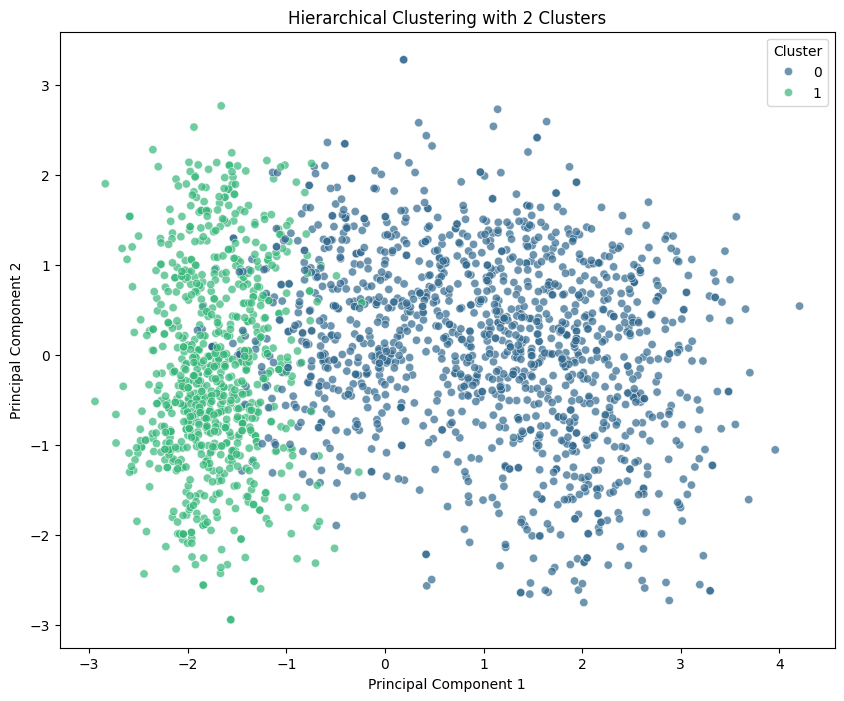

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Hierarchical_Cluster'] = hierarchical_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a density-based clustering algorithm that creates clusters based on the idea of dense regions of points. The core concept is that a point belongs to a cluster if it is close to many points from that cluster. This makes it suitable for clustering when you have clusters of similar density.

The key feature of DBSCAN is its ability to find arbitrarily shaped clusters and its robustness to outliers, which are classified as noise.

Mathematical Formulation:
DBSCAN requires two parameters:

eps (ε): A distance measure that defines the neighborhood around a data point; i.e., if the distance between two points is lower or equal to eps, they are considered neighbors.
min_samples: The minimum number of points required to form a dense region; i.e., for a point to be considered a core point, its ε-neighborhood must contain at least min_samples points.
There are three types of points identified by DBSCAN:

Core Points: A point is a core point if at least min_samples points are within distance ε of it (including the point itself).
Border Points: A point is a border point if it’s not a core point, but lies within distance ε of a core point.
Noise Points: All other points that are neither core nor border points.
Clusters are formed as follows:

If a point is a core point, then all points in its ε-neighborhood are part of the same cluster. This includes border points, although border points can be shared between clusters.
If a point is a border point and is reachable from more than one cluster, it is assigned to the closest cluster.
Noise points are not included in any cluster.
DBSCAN works well when all the clusters are approximately the same density, but can struggle with clusters of varying density. It's particularly effective for spatial data and has been applied widely in areas such as astronomy, geospatial analysis, and anomaly detection.

3. DBSCAN
DBSCAN groups together points that are closely packed together and marks as outliers the points that lie alone in low-density regions. It requires two parameters: eps, which specifies how close points should be to each other to be considered part of a cluster, and min_samples, which specifies how many neighbors a point should have to be included in a cluster.

In [52]:
from sklearn.cluster import DBSCAN

# The parameters below are just starting points. You'll need to adjust them based on your dataset.
dbscan = DBSCAN(eps=0.9, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Adding DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = db_labels
df['DBSCAN_Cluster']

0       0
1       1
2       2
3       1
4       1
       ..
2235    1
2236   -1
2237    0
2238    1
2239    3
Name: DBSCAN_Cluster, Length: 2229, dtype: int64

In [53]:
# Count the number of elements in each cluster
unique, counts = np.unique(db_labels, return_counts=True)
print(dict(zip(unique, counts)))


{-1: 51, 0: 189, 1: 881, 2: 752, 3: 295, 4: 41, 5: 20}


The DBSCAN clustering results with eps=0.9 yield the following:

Noise Points: A total of 51 points are classified as noise (up from 37 when eps was 0.9). While higher than the previous iteration, this is still a relatively small proportion of the dataset, which could indicate that most data points are within dense regions.
Main Clusters: There are three large clusters:
Cluster 0 contains 189 points.
Cluster 1 is the largest with 881 points.
Cluster 2 has 752 points.
Cluster 3 includes 295 points.
These main clusters likely capture the core structure of the dataset. The fact that the sizes of these clusters have not changed significantly from the previous run with eps=0.95 suggests some stability in cluster assignments at these eps levels.
Smaller Clusters: Clusters 4 and 5 remain small, with 41 and 20 points, respectively. They may represent more specific subgroups within the dataset or could be on the border between dense regions and noise.
Interpretation:
The results suggest a stable clustering structure for the main part of the data, with minor variations in noise points as eps is adjusted between 0.9 and 0.95. The existence of three large clusters and a couple of smaller ones can offer insightful segmentation of the data, assuming these clusters are meaningful based on domain knowledge and the validation metrics are sound.

The slight increase in noise points compared to the eps=0.95 setting could indicate that eps=0.9 is not encompassing as many of the borderline points within the dense clusters. However, it's a subtle balance between including too many points (potentially diluting cluster meaning) and too few (excluding valuable data).

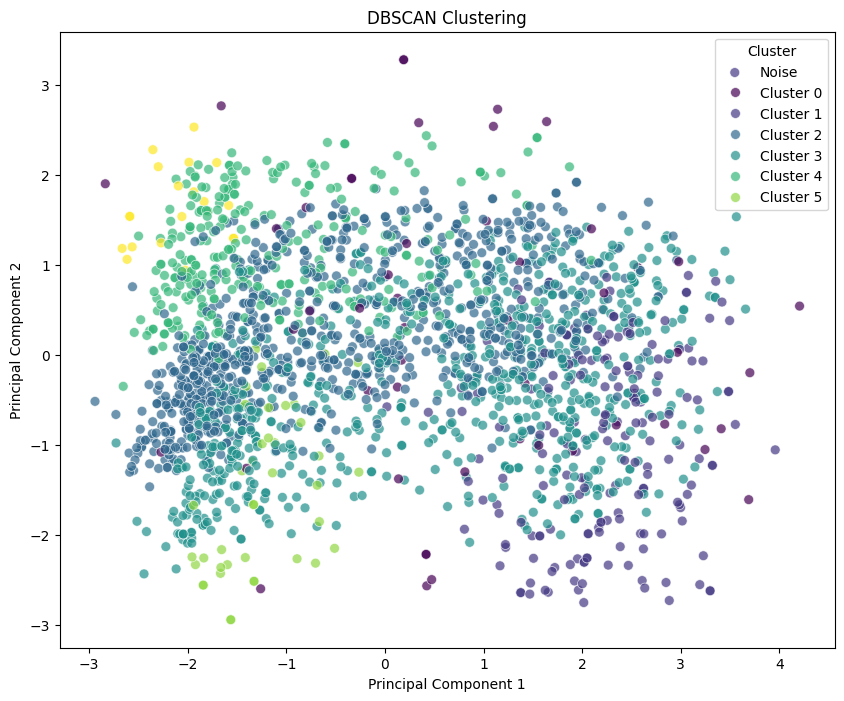

In [54]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DBSCAN_Cluster'] = db_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis', alpha=0.7, legend="full", s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Adjust the legend to not plot the noise points as a separate color
plt.legend(title='Cluster', labels=['Noise'] + [f'Cluster {i}' for i in range(len(np.unique(db_labels))-1)])
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, db_labels)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.0006522273295484744


DBScan algorithm is struggles with high dimensional data , it might not a good fit for our data.

References:

Kaggle. (2024). Customer Segmentation : Clustering [Data set]. https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering